In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#read the original image
path = "/media/mount/nvme0n1p4/Pranto/study/4-1/Digital Image Processing/DIP_Lab/SrcImage/dog.jpg"  # Replace with your image path
img_bgr = cv2.imread(path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img_gray, (512, 512))
original_img =  img

In [10]:
# add some random salt and pepper noise
import random

num_of_row, num_of_col = img.shape

# Adding some pepper noise
number_of_pixels = 10000
for i in range(number_of_pixels):
    x_coordinate = random.randint(0, num_of_row - 1)
    y_coordinate = random.randint(0, num_of_col - 1)
    img[x_coordinate][y_coordinate] = 255

# Adding some salt noise
number_of_pixels = 10000
# number_of_pixels = random.randint(300, 10000)
for i in range(number_of_pixels): 
    x_coordinate = random.randint(0, num_of_row - 1)
    y_coordinate = random.randint(0, num_of_col - 1)
    img[x_coordinate][y_coordinate] = 0


def Call_psnr(before,after,peakValue):
    before = np.array(before,dtype=np.float64)
    after = np.array(after,dtype=np.float64)
    mse = np.mean((before-after)**2)
    psnr = 20*np.log10(peakValue)-10*np.log10(mse)
    before = np.array(before,dtype=np.uint8)
    after = np.array(after,dtype=np.uint8)
    return round(psnr,2)


In [11]:
# print(padded_img[0 : 3, 0 : 3] )
# print(type(np.prod(padded_img[0 : 3, 0 : 3]) % 255))

/tmp/ipykernel_6545/3160945209.py:26: RuntimeWarning: divide by zero encountered in log10
  psnr = 20*np.log10(peakValue)-10*np.log10(mse)


(512, 512)
(512, 512)


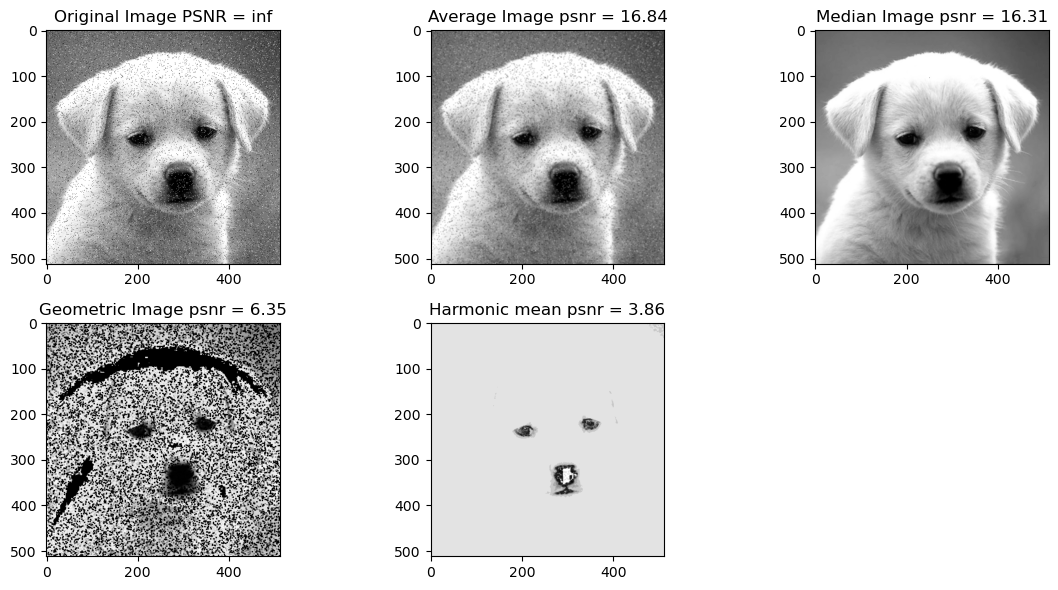

In [12]:
# Define the mask size and compute the padding size
mask_dim = input('Enter the odd dimension of your mask: ')
mask_dim = int(mask_dim)
padding = mask_dim // 2

# Create an average filter mask
mask = np.ones((mask_dim, mask_dim), dtype=np.float32) / (mask_dim * mask_dim)

# Pad the image with replication of edge pixels
padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

# Initialize output images
avg_img = np.copy(img)
median_img = np.copy(img)
geometric_img = np.copy(img)
harmonic_img = np.copy(img)

# Apply average filter
for i in range(padding, img.shape[0] + padding):
    for j in range(padding, img.shape[1] + padding):
        sum_val = np.sum(padded_img[i - padding:i + padding + 1, j - padding:j + padding + 1] * mask)
        avg_img[i - padding, j - padding] = sum_val

# Apply median filter
for i in range(padding, img.shape[0] + padding):
    for j in range(padding, img.shape[1] + padding):
        neighborhood = padded_img[i - padding:i + padding + 1, j - padding:j + padding + 1]
        median_val = np.median(neighborhood)
        median_img[i - padding, j - padding] = median_val

# Apply Geometric Mean filter
for i in range(padding, img.shape[0] + padding):
    for j in range(padding, img.shape[1] + padding):
        # mul = 1.0
        # for k in range(i, i + padding):
        #     for l in range(j, j + padding):
        #         if(padded_img[k, l] != 0):
        #             mul *= padded_img[k, l]
        # geometric_img[i - padding, j - padding] = mul ** (1.0 / (mask_dim * mask_dim))
        neighborhood_matrix = padded_img[i - padding: i + padding + 1, j - padding: j + padding + 1]
        neighborhood_matrix = neighborhood_matrix + 1
        neighborhood_multiplication = np.prod(neighborhood_matrix)
        neighboorhood_power = (neighborhood_multiplication ** (1 / (mask_dim * mask_dim)))
        scale = neighboorhood_power % 255
        geometric_img[i - padding, j - padding] = scale

# Apply Harmonic Mean filter
for i in range(padding, img.shape[0] + padding):
    for j in range(padding, img.shape[1] + padding):
        sum = 1.0
        for k in range((i - padding), (i + padding + 1)):
            for l in range((j - padding), (j + padding + 1)):
                if(padded_img[k, l] != 0):
                    sum += (1 / padded_img[k, l])
                # sum += (1 / (padded_img[k, l] + 1))
        harmonic_img[i - padding, j - padding] = (mask_dim * mask_dim) / sum


# Plot the images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')

plt.title(f"Original Image PSNR = {Call_psnr(original_img, img, 255)}")

plt.subplot(2, 3, 2)
plt.imshow(avg_img, cmap='gray')
plt.title(f'Average Image psnr = {Call_psnr(original_img, avg_img, 255)}')
print(avg_img.shape)

plt.subplot(2, 3, 3)
plt.imshow(median_img, cmap='gray')
plt.title(f'Median Image psnr = {Call_psnr(original_img, median_img, 255)}')
print(median_img.shape)

plt.subplot(2, 3, 4)
plt.imshow(geometric_img, cmap='gray')
plt.title(f'Geometric Image psnr = {Call_psnr(original_img, geometric_img, 255)}')

plt.subplot(2, 3, 5)
plt.imshow(harmonic_img, cmap='gray')
plt.title(f'Harmonic mean psnr = {Call_psnr(original_img, harmonic_img, 255)}')

plt.tight_layout()
plt.show()
